In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# we now want to clean the data from eclipse.csv, manipulate it, and store it in a pandas DataFrame
with open('eclipse.csv', newline='') as eclipse: # let's open eclipse.csv
    reader = csv.reader(eclipse) # initialize a csv reader
    data = list(reader) # store the data from the csv as a list of lists
    #print(data[2])
    data.pop(2) # remove the row of links because they are unnecessary
    #print(data[2])
    data2 = data[2:] # store all of the non-header data in a separate list
    #print(data2[0])

    for row in data2: # iterate through each row of data2
        if row[5] != "  - ": # we want to turn the string that represents time into meaningful numbers
            # the data is currently in the form "00m00s" or "  - " but we first want to look at nonzero data
            lng = row[5].strip() # first, we strip the whitespace
            mins = int(lng[:2]) # we turn the minutes from the string into an int
            secs = int(lng[3:5]) # we turn the seconds from the string into an int
            tot = mins + secs/60 # we represent the total of minutes and seconds as a float of minutes
            row.append(mins) # we add minutes to the list
            row.append(secs) # we add seconds to the list
            row.append(tot) # we add the total to the list
        else: # if there is no data on the time, it is in the csv file as "  - " so now we must handle it
            row.append(0) # we want to ensure all rows have the same number of columns
            row.append(0) # so we append three zeros since we can not perform the operations above
            row.append(0)
        
        row2 = row[0].strip() # now we will look at the date and strip the whitespeace
        month = row2[5:8] # we can extract the 3 letter abbreviation of the month
        row.append(month) # we add it as an element to the row
        year = row2[:4] # we can also extract the year
        row.append(int(year)) # the year can be stored as an int and appended
        
        row3 = row[1].strip() # we can also look at the time of day
        hour = row3[0:2] # we can pull the hour from the time of day string
        row.append(int(hour)) # convert it to an integer and append it
        
        row[2] = row[2].strip() # we will also strip the whitespace from the type of eclipse for the histogram

    newdata = pd.DataFrame(data=data2) # now we store the cleaned data into a dataframe called newdata

In [7]:
newdata.columns = ['Date', 'TD of Peak', 'Eclipse Type', 'Saros Series', 'Eclipse Magnitude', 'Central Duration', 'Geographic Region of Visibility', 'Minutes', 'Seconds', 'Time', 'Month', 'Year', 'Hour']
print(newdata['Eclipse Type'])
# we add headers to the newdata dataframe, shortening some of the old ones and adding headers for all the new columns we made above

0     Annular
1       Total
2     Partial
3     Partial
4      Hybrid
5     Annular
6       Total
7     Annular
8     Partial
9     Partial
10    Annular
11      Total
12    Annular
13      Total
14    Annular
15      Total
16    Partial
17    Partial
18    Partial
19    Partial
20    Annular
21      Total
Name: Eclipse Type, dtype: object


In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # let's make a list of all the months
pdMonth = pd.DataFrame() # and create a new dataframe
pdMonth['Month'] = months # we can store the list of months in the dataframe
pdMonth['Average Duration'] = [0,0,0,0,0,0,0,0,0,0,0,0] # and we can a column called Average Duration set to 0
print(pdMonth) 

Month  Average Duration
0    Jan                 0
1    Feb                 0
2    Mar                 0
3    Apr                 0
4    May                 0
5    Jun                 0
6    Jul                 0
7    Aug                 0
8    Sep                 0
9    Oct                 0
10   Nov                 0
11   Dec                 0


In [10]:
# we now want to go through all of our datapoints and calculate the average duration of an eclipse for each month
for inde, rw in pdMonth.iterrows(): # we iterate through each of the month abbreviations in our pdMonth df that we just made
    tot = 0 # we need to know the sum of the length of the eclipses for that month
    count = 0 # and the number of eclipses to calculate the average
    for ind, row in newdata.iterrows(): # now we iterate through each item of our newdata df that has all of our datapoints
        if row['Month'] == rw['Month'] and row['Time'] != 0.0: # we want to test to see if it's the right month and nonzero time
            tot += row['Time'] # if it matches, we add the time to the total time for that month 
            count += 1 # and we increment the count by 1
    if count > 0: # some months may have a zero count so we want to avoid a divide by zero error
        pdMonth.loc[inde, 'Average Duration'] = tot/count # if they are nonzero, we can calculate the average duration and store it
        # print(tot/count)
    else:
        pdMonth.loc[inde, 'Average Duration'] = 0 # if the count = 0, we just store 0 as the average duration (this is redundant)
        

In [11]:
print(pdMonth) # we can check the code above by printing the pdMonth dataframe

Month  Average Duration
0    Jan         10.450000
1    Feb          5.091667
2    Mar          0.000000
3    Apr          2.866667
4    May          0.000000
5    Jun          4.600000
6    Jul          5.166667
7    Aug          4.341667
8    Sep          0.000000
9    Oct          6.350000
10   Nov          3.733333
11   Dec          1.900000


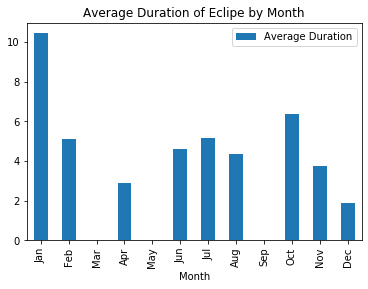

In [12]:
pdMonth.plot(kind='bar', x='Month', y='Average Duration', title='Average Duration of Eclipe by Month')

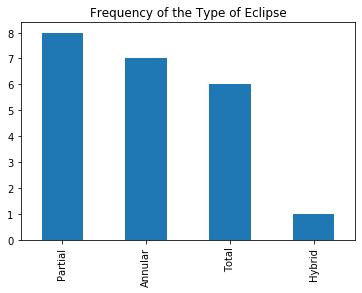

In [17]:
newdata['Eclipse Type'].value_counts().plot(kind='bar', title='Frequency of the Type of Eclipse')

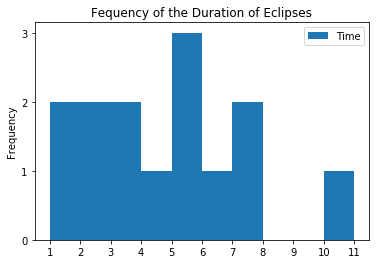

In [24]:
newdata[['Time']].plot(kind='hist', bins=[1,2,3,4,5,6,7,8,9,10,11], xticks=[1,2,3,4,5,6,7,8,9,10,11], yticks=[0,1,2,3], title='Fequency of the Duration of Eclipses')
# newdata[['Time']].plot(kind='hist', bins=[1,3,5,7,9,11], xticks=[1,3,5,7,9,11])
# can group by 2 minutes or 1 minute

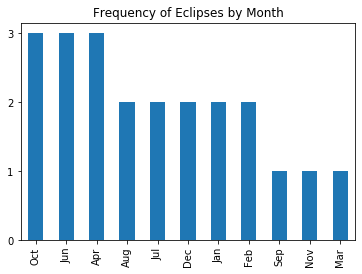

In [28]:
newdata['Month'].value_counts().plot(kind='bar', yticks=[0,1,2,3], title='Frequency of Eclipses by Month')

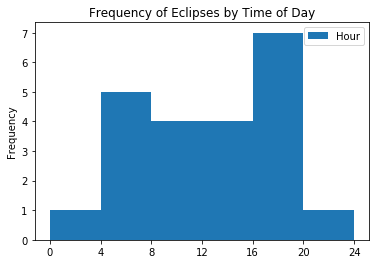

In [30]:
newdata[['Hour']].plot(kind='hist', bins=[0,4,8,12,16,20,24], xticks=[0,4,8,12,16,20,24], title='Frequency of Eclipses by Time of Day')

In [35]:
print(newdata[(newdata['Eclipse Type'] == 'Total')])
# We want to see a list of all of the total eclipses
# So we filter for Eclipse Type of Total

Date  TD of Peak Eclipse Type Saros Series Eclipse Magnitude  \
1     2021 Dec 04    07:34:38         Total         152              1.037   
6     2024 Apr 08    18:18:29         Total         139              1.057   
11    2026 Aug 12    17:47:05         Total         126              1.039   
13    2027 Aug 02    10:07:49         Total         136              1.079   
15    2028 Jul 22    02:56:39         Total         146              1.056   
21    2030 Nov 25    06:51:37         Total         133              1.047   

   Central Duration                    Geographic Region of Visibility  \
1           01m54s    Antarctica, S. Africa, s Atlantic\n[Total: An...   
6           04m28s    N. America, C. America\n[Total: Mexico, c US,...   
11          02m18s    n N. America, w Africa, Europe \n[Total: Arct...   
13          06m23s    Africa, Europe, Mid East, w & s Asia\n[Total:...   
15          05m10s    SE Asia, E. Indies, Australia, N.Z.\n[Total: ...   
21          03m44s    s

In [94]:
print(newdata[(newdata['Time'] == newdata['Time'].max())])
# We want to see which eclipse has the longest duration
# So we filter for the maximum Time

              Date  TD of Peak Eclipse Type Saros Series Eclipse Magnitude  \
14    2028 Jan 26    15:08:58       Annular         141              0.921   

   Central Duration                    Geographic Region of Visibility  \
14          10m27s    e N. America, C. & S. America, w Europe, nw A...   

    Minutes  Seconds   Time Month  Year  Hour  
14       10       27  10.45   Jan  2028    15  


In [97]:
newdat = newdata[(newdata['Eclipse Type'] == 'Total')]
print(newdat[newdat['Time'] == newdat['Time'].max()])
# We want to combine the previous searches and show the longest Total eclipse
# We first have to filter by Total then use the maximum on the result

              Date  TD of Peak Eclipse Type Saros Series Eclipse Magnitude  \
13    2027 Aug 02    10:07:49         Total         136              1.079   

   Central Duration                    Geographic Region of Visibility  \
13          06m23s    Africa, Europe, Mid East, w & s Asia\n[Total:...   

    Minutes  Seconds      Time Month  Year  Hour  
13        6       23  6.383333   Aug  2027    10  
